In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium as fl
import matplotlib.pyplot as plt

In [ ]:
data_set = pd.read_csv("D:\Customer Segmentation Project\DATSET_CUSTOMER_SEGMENTATION.csv")

In [ ]:
data_set.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
data_set.shape

(541909, 9)

In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [ ]:
null_info=pd.DataFrame(data_set.isnull().sum()).T.rename(index={0:'null values'})
display(null_info)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
null values,0,0,0,1454,0,0,0,135080,0


In [ ]:
data_set.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dimensions', data_set.shape)
null_info=pd.DataFrame(data_set.isnull().sum()).T.rename(index={0:'null values'})
display(null_info)

Dimensions (406829, 9)


,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
null values,0,0,0,0,0,0,0,0,0


In [ ]:
temp = data_set[['CustomerID', 'InvoiceNo', 'Country']].groupby(
    ['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Total cuntries: {}'.format(len(countries)))

Total cuntries: 37


In [ ]:
order_per_count = data_set[['CustomerID','Country']].groupby(['Country']).count()
order_per_count = order_per_count.reset_index(drop = False)
country_table = order_per_count.sort_values(
    by='CustomerID', ascending=False).rename(index=str,
                                        columns={"CustomerID": "Number of orders"})

In [ ]:
print(country_table)

                 Country  Number of orders
35        United Kingdom            361878
14               Germany              9495
13                France              8491
10                  EIRE              7485
30                 Spain              2533
23           Netherlands              2371
3                Belgium              2069
32           Switzerland              1877
26              Portugal              1480
0              Australia              1259
24                Norway              1086
18                 Italy               803
6        Channel Islands               758
12               Finland               695
7                 Cyprus               622
31                Sweden               462
1                Austria               401
9                Denmark               389
19                 Japan               358
25                Poland               341
33                   USA               291
17                Israel               250
36         

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(country_table, left_on='name', right_on='Country', how='left')


C:\Users\ritam\AppData\Local\Temp\ipykernel_3160\432614517.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [ ]:
world_map = fl.Map()

In [ ]:
fl.Choropleth(
    geo_data=merged,
    name='choropleth',
    data=country_table,
    columns=['Country', 'Number of orders'],
    key_on='feature.properties.name',
    fill_color='OrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Orders from countries'
).add_to(world_map)
world_map

# Date time exploration

In [ ]:
data_set['InvoiceDate'] = pd.to_datetime(data_set['InvoiceDate'],infer_datetime_format=True)
data_set['Date']=data_set['InvoiceDate'].dt.strftime('%d/%m/%Y')
data_set['Time']=data_set['InvoiceDate'].dt.strftime('%H:%M')
data_set['Day of Week']=data_set['InvoiceDate'].dt.strftime('%A')
data_set['Month']=data_set['InvoiceDate'].dt.strftime('%B')
data_set['Sales_Total']=data_set['Quantity']*data_set['UnitPrice']
data_set.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Day of Week,Month,Sales_Total
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,20.34


In [ ]:
transactoins_by_month=data_set.loc[:,['Sales_Total','Month']]
transactoins_by_month['Month'].value_counts()

November     65598
October      50695
December     44511
September    40822
May          28908
June         27836
March        27822
August       27662
July         27502
April        23198
January      21912
February     20363
Name: Month, dtype: int64

In [ ]:
sales_by_month=transactoins_by_month.groupby('Month').sum().unstack()['Sales_Total']
sales_by_month

Month
April         426047.851
August        616368.000
December      897110.400
February      436546.150
January       475074.380
July          574238.481
June          608013.160
March         579964.610
May           648251.080
November     1132407.740
October       974603.590
September     931440.372
dtype: float64

In [ ]:
label_months=['January','February','March','April','May','June','July','August','September','October','November','December']
sales_in_month=sales_by_month[label_months]
sales_in_month

Month
January       475074.380
February      436546.150
March         579964.610
April         426047.851
May           648251.080
June          608013.160
July          574238.481
August        616368.000
September     931440.372
October       974603.590
November     1132407.740
December      897110.400
dtype: float64

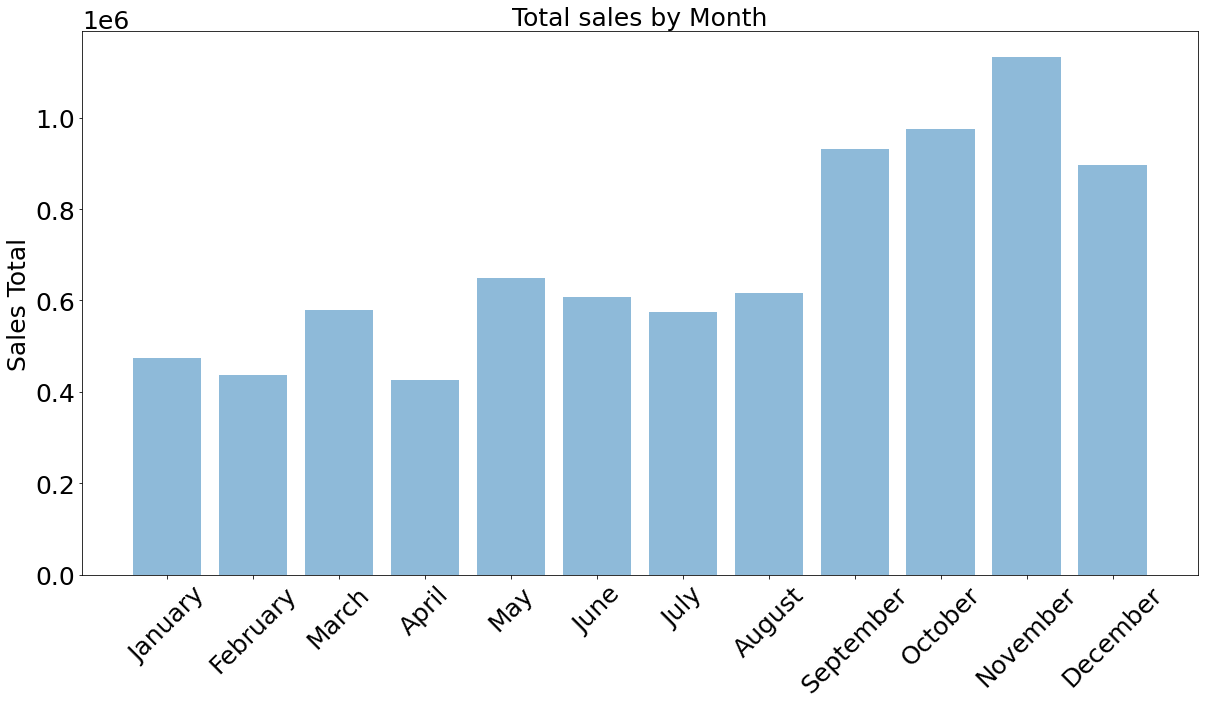

In [ ]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
labels_=('January','February','March','April','May','June','July','August','September','October','November','December')
plt.bar(labels_,sales_in_month,align='center',alpha=0.5)
plt.xticks(labels_,rotation=45)
plt.ylabel('Sales Total',size=25)
plt.title('Total sales by Month',size=25)
plt.show()

In [ ]:
wd= data_set.loc[:,['Day of Week','Sales_Total']]
new_row = [{'Day of Week':'Saturday','Sales_Total':0}]
wd=wd.append(new_row,ignore_index=True)
sales_by_day=wd.groupby('Day of Week').sum().unstack()['Sales_Total']
sales_by_day

C:\Users\ritam\AppData\Local\Temp\ipykernel_3160\2900068011.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wd=wd.append(new_row,ignore_index=True)


Day of Week
Friday       1241316.181
Monday       1274551.511
Saturday           0.000
Sunday        784418.851
Thursday     1906108.190
Tuesday      1563193.591
Wednesday    1530477.490
dtype: float64

In [ ]:
label_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sales_by_days_in_week=sales_by_day[label_days]
sales_by_days_in_week

Day of Week
Monday       1274551.511
Tuesday      1563193.591
Wednesday    1530477.490
Thursday     1906108.190
Friday       1241316.181
Saturday           0.000
Sunday        784418.851
dtype: float64

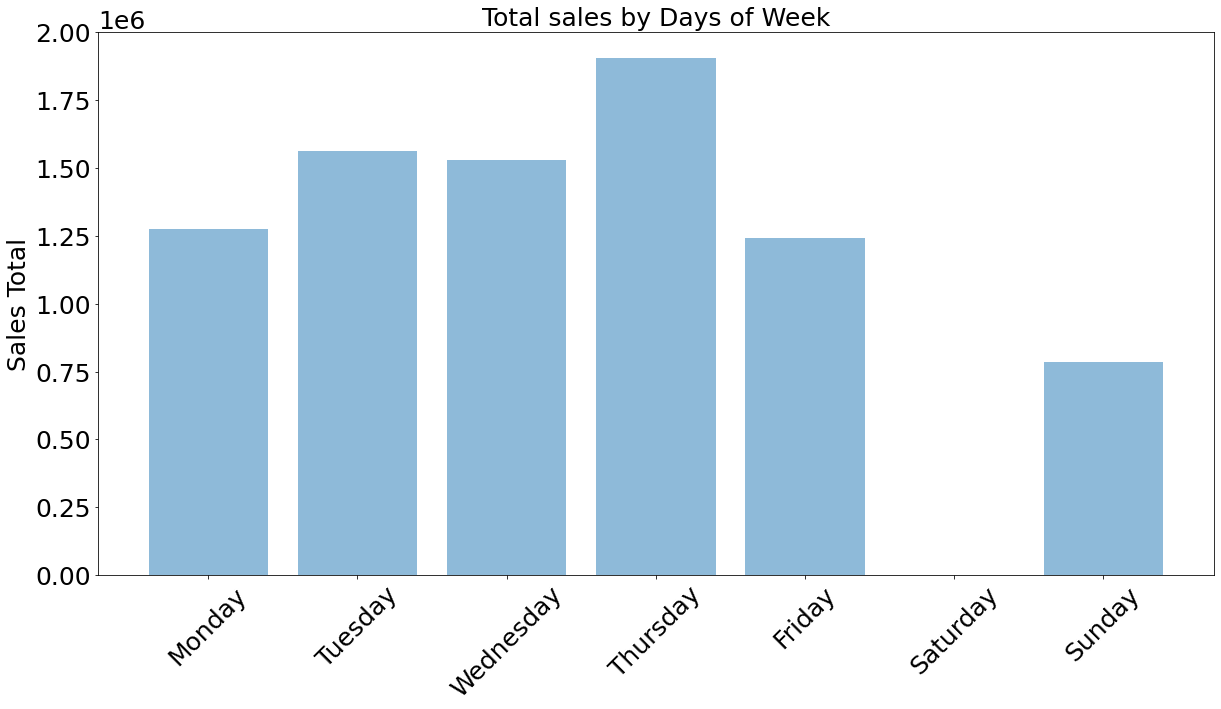

In [ ]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
labelwd= ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')
plt.bar(labelwd,sales_by_days_in_week,align='center',alpha=0.5)
plt.xticks(labelwd,rotation=45)
plt.ylabel('Sales Total',size=25)
plt.title('Total sales by Days of Week',size=25)
plt.show()

# Country by dates


In [ ]:
data_set['Country'] = data_set['Country'].replace({'RSA': 'South Africa', 'EIRE': 'Ireland', 'USA': 'United States of America'})
cluster_info = {
    0: ['France', 'Portugal', 'Spain', 'Ireland', 'United Kingdom', 'Iceland'],
    1: ['Israel', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Cyprus'],
    2: ['Poland', 'Austria', 'Lithuania', 'Germany', 'Greece', 'Switzerland', 'Belgium', 'Netherlands', 'Italy', 'Denmark'],
    3: ['Norway', 'Sweden', 'Finland'],
    4: ['Brazil'],
    5: ['South Africa'],
    6: ['Canada', 'United States of America'],
    7: ['Australia'],
    8: ['Japan']
}

data_set['Cluster'] = ''

for cluster, countries in cluster_info.items():
    data_set.loc[data_set['Country'].isin(countries), 'Cluster'] = cluster
data_set.to_csv('Countries__Order_with_Cluster.csv', index=False)
data_set.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Time,Day of Week,Month,Sales_Total,Cluster
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,15.30,0
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,20.34,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,22.00,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,20.34,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,01/12/2010,08:26,Wednesday,December,20.34,0


In [ ]:
sub_country_date = data_set.loc[:,['Cluster','Sales_Total']]
subset_by_date=sub_country_date.groupby('Cluster').sum().sort_values(by='Sales_Total',ascending=False)
subset_by_date

,Sales_Total
Cluster,
0,7303015.844
2,662407.800
7,137077.270
3,94086.110
,36927.090
8,35340.620
1,23667.870
6,5397.300
4,1143.600


In [ ]:
subset= data_set.loc[:,['Cluster','Sales_Total','Date','Month']]
subset.head()

,Cluster,Sales_Total,Date,Month
0,0,15.30,01/12/2010,December
1,0,20.34,01/12/2010,December
2,0,22.00,01/12/2010,December
3,0,20.34,01/12/2010,December
4,0,20.34,01/12/2010,December


In [ ]:
data_set['Date']=data_set['InvoiceDate'].dt.strftime('%m/%d')
cluster_date = data_set.loc[:,['Cluster','Sales_Total','Date']]
new_cluster =cluster_date.groupby(['Cluster','Date']).sum().sort_values(by='Date',ascending=True)
new_cluster

,,Sales_Total
Cluster,Date,
0,01/04,10542.30
3,01/04,507.56
0,01/05,28309.54
2,01/05,-159.14
7,01/06,7154.38
...,...,...
2,12/21,9142.55
0,12/22,4220.40
2,12/22,600.72


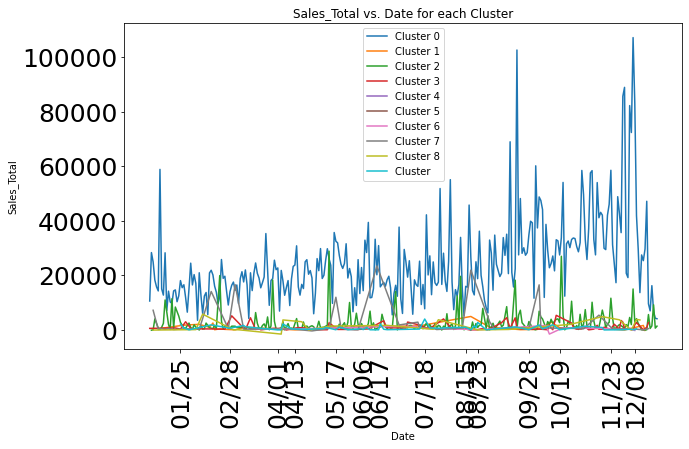

In [ ]:
new_cluster.reset_index(inplace=True)

grouped_data = new_cluster.groupby('Cluster')

plt.figure(figsize=(10, 6))

for cluster, group in grouped_data:
    plt.plot(group['Date'], group['Sales_Total'], label=f"Cluster {cluster}")

num_ticks = 12
tick_indices = range(0, len(group['Date']), len(group['Date']) // num_ticks)
plt.xticks(group['Date'].iloc[tick_indices],rotation=90)
plt.xlabel('Date')
plt.ylabel('Sales_Total')
plt.title('Sales_Total vs. Date for each Cluster')
plt.legend()
plt.show()


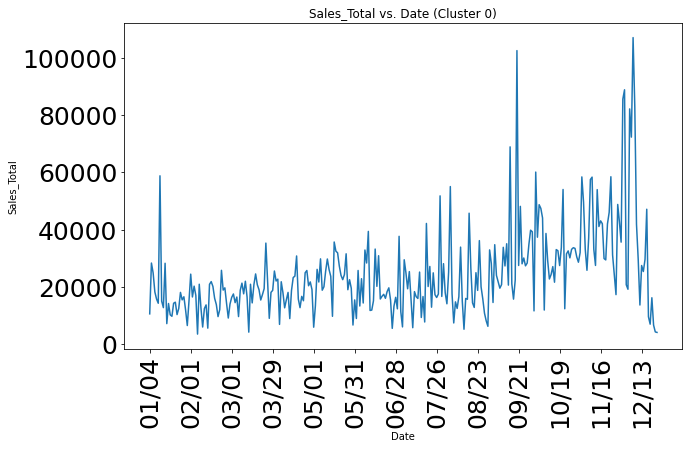

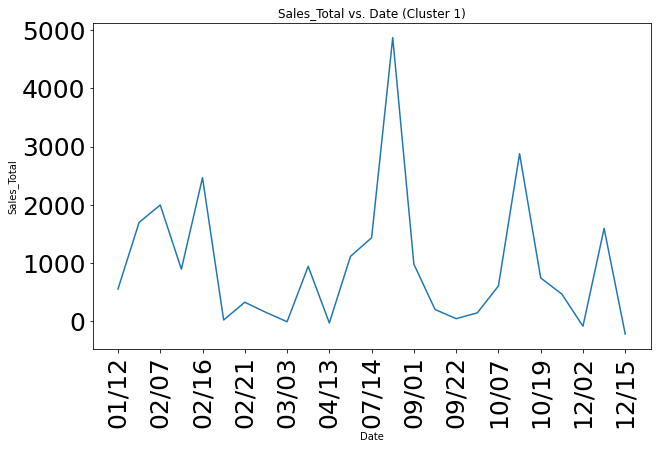

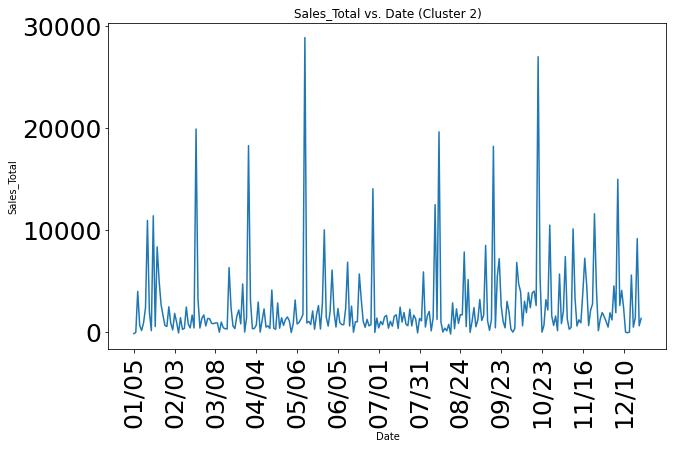

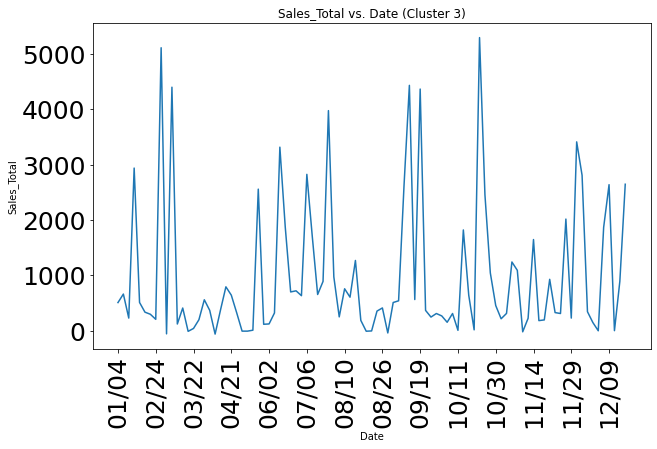

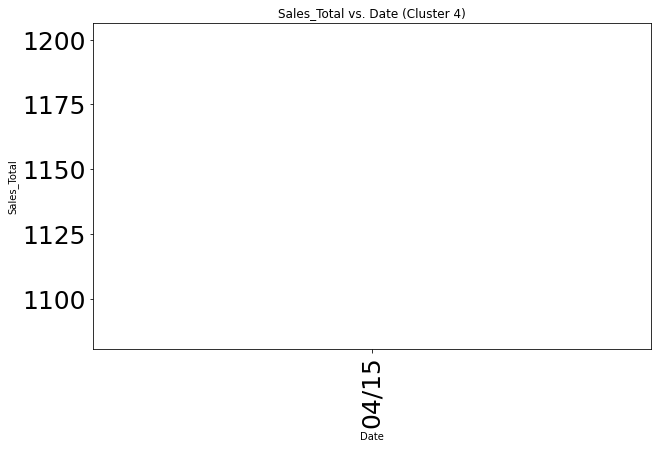

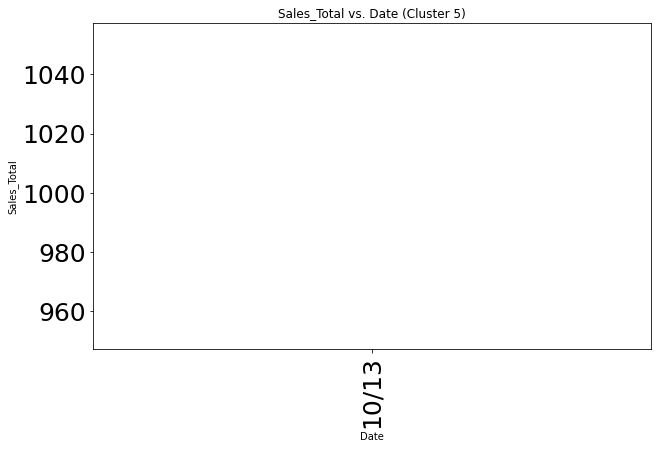

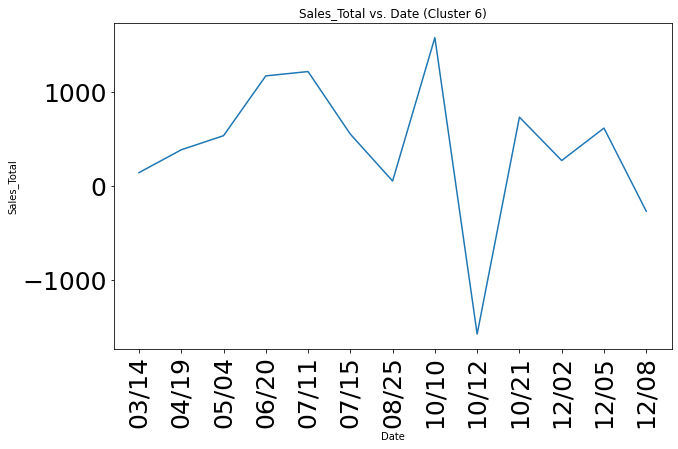

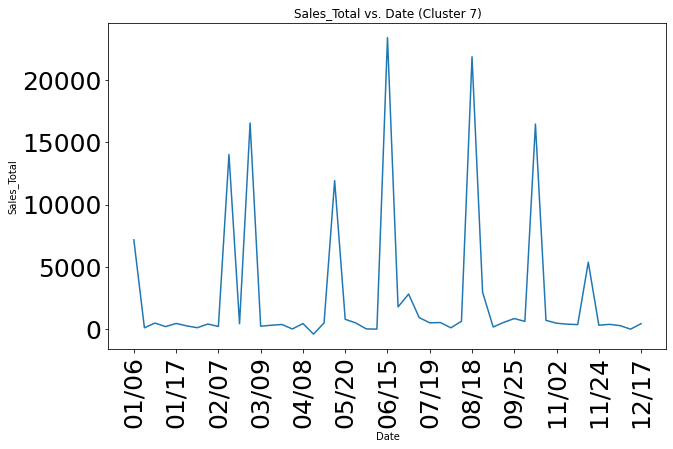

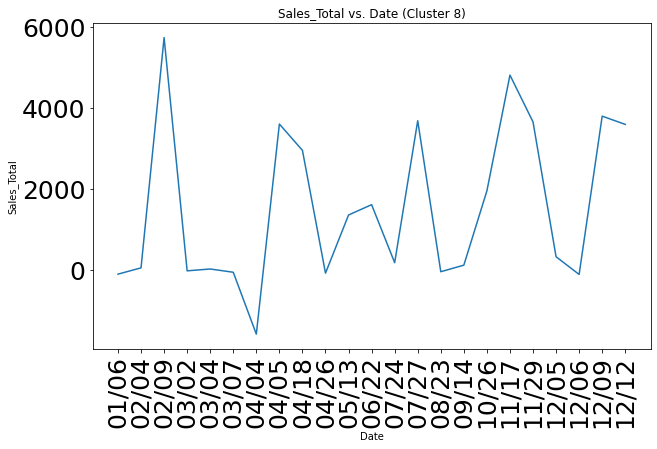

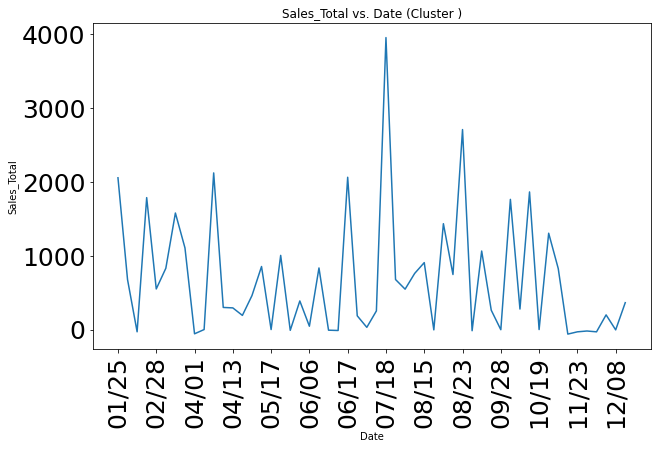

In [ ]:
new_cluster.reset_index(inplace=True)

grouped_data = new_cluster.groupby('Cluster')

for cluster, group in grouped_data:

    fig, ax = plt.subplots(figsize=(10, 6))

    ax.plot(group['Date'], group['Sales_Total'])

    ax.set_xlabel('Date')
    ax.set_ylabel('Sales_Total')
    ax.set_title(f'Sales_Total vs. Date (Cluster {cluster})')

    num_ticks = 12
    if len(group['Date']) < num_ticks:
        tick_indices = range(len(group['Date']))
    else:
        tick_indices = range(0, len(group['Date']), len(group['Date']) // num_ticks)
    plt.xticks(group['Date'].iloc[tick_indices],rotation=90)

    plt.show()



# **COUNTRIES CLUSTERING**

In [ ]:
import geopandas as gpd

In [ ]:
ct = order_per_count.sort_values(
    by='CustomerID', ascending=False).rename(index=str,
                                        columns={"CustomerID": "Number of orders"})


ct

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


df = pd.read_csv('Countries__Order.csv')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, left_on='name', right_on='Country', how='left')

merged = merged[merged['Number of orders'].notna()]

min_order = merged['Number of orders'].min()
max_order = merged['Number of orders'].max()

norm = Normalize(vmin=min_order, vmax=max_order)

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

for idx, row in merged.iterrows():
    order = row['Number of orders']
    color = plt.cm.YlOrRd(norm(order))
    merged.loc[idx:idx].plot(ax=ax, color=color, edgecolor='black')

for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged['Number of orders']):
    ax.text(x, y, int(label), fontsize=8, ha='center', va='center')

sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
cbar = plt.colorbar(sm)
cbar.set_label('Number of orders')

plt.title('Orders by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union


df = pd.read_csv('Countries__Order.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, left_on='name', right_on='Country', how='left')

merged = merged.dropna(subset=['Number of orders'])


In [ ]:
df.head()

In [ ]:
clusters = []
for idx, geometry in enumerate(merged.geometry):
    new_cluster = True
    for cluster in clusters:
        if any(geometry.touches(cluster_geom) or geometry.intersects(cluster_geom) for cluster_geom in cluster):
            cluster.append(geometry)
            new_cluster = False
            break
    if new_cluster:
        clusters.append([geometry])



In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.to_csv("World.csv")

In [ ]:
pd.DataFrame([{'products': len(data_set['StockCode'].value_counts()),
               'transactions': len(data_set['InvoiceNo'].value_counts()),
               'customers': len(data_set['CustomerID'].value_counts()),
              }], columns = ['products', 'transactions', 'customers'],
              index = ['quantity'])

In [ ]:
temp = data_set.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from shapely.ops import cascaded_union

df = pd.read_csv('Countries__Order.csv')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

merged = world.merge(df, left_on='name', right_on='Country', how='left')

merged = merged.dropna(subset=['Number of orders'])

centroids = merged.geometry.centroid
centroids = pd.DataFrame({'lon': centroids.x, 'lat': centroids.y})

clustering = AgglomerativeClustering(n_clusters=9, distance_threshold=None).fit(centroids)

merged['Cluster'] = clustering.labels_

cluster_totals = merged.groupby('Cluster')['Number of orders'].sum()

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

num_clusters = merged['Cluster'].nunique()
colors = plt.cm.get_cmap('tab20', num_clusters)


cluster_info = []
for cluster in range(num_clusters):
    cluster_data = merged[merged['Cluster'] == cluster]
    cluster_color = colors(cluster)

    cluster_data.plot(ax=ax, color=cluster_color, linewidth=0.8, edgecolor='0.8')

    cluster_countries = ', '.join(cluster_data['name'])
    cluster_order_total = int(cluster_totals[cluster])
    cluster_info.append((cluster, cluster_countries, cluster_color, cluster_order_total))

    cluster_order_total = int(cluster_totals[cluster])


    cluster_centroid = cluster_data.unary_union.centroid
    centroid_x, centroid_y = cluster_centroid.x, cluster_centroid.y


    ax.text(centroid_x, centroid_y, cluster_order_total, fontsize=8, ha='center', va='center')


plt.title('Total Orders by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


for cluster, total in cluster_totals.items():
    print(f'Cluster {cluster}: Total Orders = {int(total)}')

for cluster, countries, color, total_orders in cluster_info:
    print(f'Cluster {cluster}: Countries: {countries} | Color: {color} | Total Orders: {total_orders}')


plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from shapely.ops import cascaded_union


df = pd.read_csv('Countries__Order.csv')


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


merged = world.merge(df, left_on='name', right_on='Country', how='left')

merged = merged.dropna(subset=['Number of orders'])


centroids = merged.geometry.centroid
centroids = pd.DataFrame({'lon': centroids.x, 'lat': centroids.y})


clustering = AgglomerativeClustering(n_clusters=9, distance_threshold=None).fit(centroids)

merged['Cluster'] = clustering.labels_

cluster_totals = merged.groupby('Cluster')['Number of orders'].sum()

fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray', edgecolor='black')

num_clusters = merged['Cluster'].nunique()
colors = plt.cm.get_cmap('tab20', num_clusters)


cluster_info = []
for cluster in range(num_clusters):
    cluster_data = merged[merged['Cluster'] == cluster]
    cluster_color = colors(cluster)

    cluster_data.plot(ax=ax, color=cluster_color, linewidth=0.8, edgecolor='0.8')


    cluster_countries = ', '.join(cluster_data['name'])
    cluster_order_total = int(cluster_totals[cluster])
    cluster_info.append((cluster, cluster_countries, cluster_color, cluster_order_total))


    cluster_order_total = int(cluster_totals[cluster])


    cluster_centroid = cluster_data.unary_union.centroid
    centroid_x, centroid_y = cluster_centroid.x, cluster_centroid.y


    ax.text(centroid_x, centroid_y, cluster_order_total, fontsize=8, ha='center', va='center')


plt.title('Total Orders by Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')


for cluster, total in cluster_totals.items():
    print(f'Cluster {cluster}: Total Orders = {int(total)}')

for cluster, countries, color, total_orders in cluster_info:
    print(f'Cluster {cluster}: Countries: {countries} | Color: {color} | Total Orders: {total_orders}')


plt.show()

In [ ]:
data_set['Country'] = data_set['Country'].replace({'RSA': 'South Africa', 'EIRE': 'Ireland', 'USA': 'United States of America'})


cluster_info = {
    0: ['France', 'Portugal', 'Spain', 'Ireland', 'United Kingdom', 'Iceland'],
    1: ['Israel', 'Lebanon', 'United Arab Emirates', 'Saudi Arabia', 'Cyprus'],
    2: ['Poland', 'Austria', 'Lithuania', 'Germany', 'Greece', 'Switzerland', 'Belgium', 'Netherlands', 'Italy', 'Denmark'],
    3: ['Norway', 'Sweden', 'Finland'],
    4: ['Brazil'],
    5: ['South Africa'],
    6: ['Canada', 'United States of America'],
    7: ['Australia'],
    8: ['Japan']
}


data_set['Cluster'] = ''


for cluster, countries in cluster_info.items():
    data_set.loc[data_set['Country'].isin(countries), 'Cluster'] = cluster


data_set.to_csv('Countries__Order_with_Cluster.csv', index=False)


# **PRPDUCT_DESCRIPTION_EXPLORATION**


In [ ]:
df_initial = pd.read_csv('./Cust_seg_dataset.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})
print('Dataframe dimensions:', df_initial.shape)
df_initial['InvoiceDate'] = pd.to_datetime(df_initial['InvoiceDate'])

In [ ]:
df_produits = pd.DataFrame(data_set['Description'].unique()).rename(columns = {0:'Description'})

In [ ]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

In [ ]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

In [ ]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)

plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Number of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()

plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [ ]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse = True)
print('Preserved words:', len(list_products))

In [ ]:
df_cleaned = data_set.copy(deep = True)

In [ ]:
liste_produits = df_cleaned['Description'].unique()

X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))
print(X)

In [ ]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])

    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()

    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

In [ ]:
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

In [ ]:
from sklearn.metrics import silhouette_score

matrix = X.values
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [ ]:
for n_clusters in range(3,10):
    print(pd.Series(n_clusters).value_counts())

In [ ]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)


    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [ ]:
pd.Series(clusters).value_counts()

In [ ]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):

    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):


        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.8)


        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))


        y_lower = y_upper + 10

In [ ]:
from sklearn.metrics import silhouette_samples

sample_silhouette_values = silhouette_samples(matrix, clusters)


graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [ ]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    print(i )
    print(liste_cluster)
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

In [ ]:
import pandas as pd


data_set['Description_cluster'] = ''

for index, row in data_set.iterrows():
    description = row['Description']
    cluster_value = None

    for i in range(n_clusters):
        liste_cluster = liste.loc[clusters == i]

        for word in liste_words:
            if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']:
                continue
            if word.upper() in description.upper():
                cluster_value = i
                break

        if cluster_value is not None:
            break

    data_set.at[index, 'Description_cluster'] = cluster_value
